Let's start with the strong scaling analysis:


In [63]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# Import the data collected on Orfeo
serial_data = pd.read_csv("./Results/serial_1000x1000x65535_robin.csv")
omp_strong_scaling_spread_data = pd.read_csv("./Results/omp_strongscaling_1000x1000x65535_spread_cores_dynamic_robin.csv")
omp_strong_scaling_close_data = pd.read_csv("./Results/omp_strongscaling_1000x1000x65535_close_cores_dynamic_robin.csv")
omp_strong_scaling_close_data_static = pd.read_csv("./Results/omp_strongscaling_1000x1000x65535_close_cores_static_robin.csv")
mpi_strong_scaling_core_data = pd.read_csv("./Results/mpi_strongscaling_1000x1000x65535_core_robin.csv")

# Convert the "n_processes", "n_threads", "Average time, "Standard deviation" and "Communication time" columns to numeric
serial_data["n_processes"] = serial_data["n_processes"].astype(int)
serial_data["n_threads"] = serial_data["n_threads"].astype(int)
serial_data["Average time"] = serial_data["Average time"].astype(float)
serial_data["Standard deviation"] = serial_data["Standard deviation"].astype(float)
serial_data["Communication time"] = serial_data["Communication time"].astype(float)
omp_strong_scaling_spread_data["n_processes"] = omp_strong_scaling_spread_data["n_processes"].astype(int)
omp_strong_scaling_spread_data["n_threads"] = omp_strong_scaling_spread_data["n_threads"].astype(int)
omp_strong_scaling_spread_data["Average time"] = omp_strong_scaling_spread_data["Average time"].astype(float)
omp_strong_scaling_spread_data["Standard deviation"] = omp_strong_scaling_spread_data["Standard deviation"].astype(float)
omp_strong_scaling_spread_data["Communication time"] = omp_strong_scaling_spread_data["Communication time"].astype(float)
omp_strong_scaling_close_data["n_processes"] = omp_strong_scaling_close_data["n_processes"].astype(int)
omp_strong_scaling_close_data["n_threads"] = omp_strong_scaling_close_data["n_threads"].astype(int)
omp_strong_scaling_close_data["Average time"] = omp_strong_scaling_close_data["Average time"].astype(float)
omp_strong_scaling_close_data["Standard deviation"] = omp_strong_scaling_close_data["Standard deviation"].astype(float)
omp_strong_scaling_close_data["Communication time"] = omp_strong_scaling_close_data["Communication time"].astype(float)
omp_strong_scaling_close_data_static["n_processes"] = omp_strong_scaling_close_data_static["n_processes"].astype(int)
omp_strong_scaling_close_data_static["n_threads"] = omp_strong_scaling_close_data_static["n_threads"].astype(int)
omp_strong_scaling_close_data_static["Average time"] = omp_strong_scaling_close_data_static["Average time"].astype(float)
omp_strong_scaling_close_data_static["Standard deviation"] = omp_strong_scaling_close_data_static["Standard deviation"].astype(float)
omp_strong_scaling_close_data_static["Communication time"] = omp_strong_scaling_close_data_static["Communication time"].astype(float)
mpi_strong_scaling_core_data["n_processes"] = mpi_strong_scaling_core_data["n_processes"].astype(int)
mpi_strong_scaling_core_data["n_threads"] = mpi_strong_scaling_core_data["n_threads"].astype(int)
mpi_strong_scaling_core_data["Average time"] = mpi_strong_scaling_core_data["Average time"].astype(float)
mpi_strong_scaling_core_data["Standard deviation"] = mpi_strong_scaling_core_data["Standard deviation"].astype(float)
mpi_strong_scaling_core_data["Communication time"] = mpi_strong_scaling_core_data["Communication time"].astype(float)

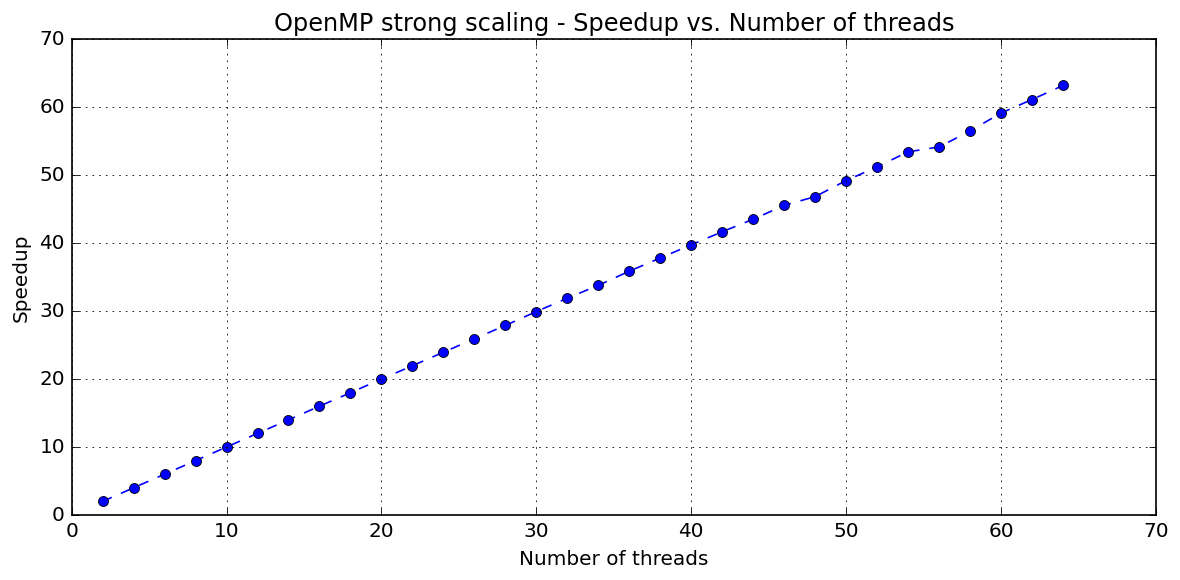

In [65]:
# Compute the speedup for the OpenMP scaling (spread and close binding - dynamic scheduling)
#omp_strong_scaling_spread_data["Speedup"] = serial_data["Average time"][0] / omp_strong_scaling_spread_data["Average time"]
omp_strong_scaling_close_data["Speedup"] = serial_data["Average time"][0] / omp_strong_scaling_close_data["Average time"]
omp_strong_scaling_spread_data["Speedup"] = serial_data["Average time"][0] / omp_strong_scaling_spread_data["Average time"]

# Compute the speed up for the OpenMP scaling (close binding with static scheduling)
omp_strong_scaling_close_data_static["Speedup"] = serial_data["Average time"][0] / omp_strong_scaling_close_data_static["Average time"]

# Compute the speedup for the MPI scaling (core binding)
mpi_strong_scaling_core_data["Speedup"] = serial_data["Average time"][0] / mpi_strong_scaling_core_data["Average time"]

# Plot the speedup for the OpenMP spread and close scaling (dynamic scheduling)
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
#plt.plot(omp_strong_scaling_spread_data["n_threads"], omp_strong_scaling_spread_data["Speedup"], marker="o", linestyle="--", color="green") # label="Spread"
plt.plot(omp_strong_scaling_close_data["n_threads"], omp_strong_scaling_close_data["Speedup"], marker="o", linestyle="--", color="blue") # label="Close"
plt.xlabel("Number of threads")
plt.ylabel("Speedup")
plt.title("OpenMP strong scaling - Speedup vs. Number of threads")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

We can see that the use of the close or the spread binding does not show significant differences in the two cases

In [66]:
# Compute the efficiency for the OpenMP spread and close scaling
omp_strong_scaling_spread_data["Efficiency"] = omp_strong_scaling_spread_data["Speedup"] / omp_strong_scaling_spread_data["n_threads"]
omp_strong_scaling_close_data["Efficiency"] = omp_strong_scaling_close_data["Speedup"] / omp_strong_scaling_close_data["n_threads"]

# Compute the efficiency mean value for the OpenMP spread and close scaling
omp_strong_scaling_spread_efficiency_mean = np.mean(omp_strong_scaling_spread_data["Efficiency"])
omp_strong_scaling_close_efficiency_mean = np.mean(omp_strong_scaling_close_data["Efficiency"])

# Print the efficiency mean value for the OpenMP spread and close scaling
print("OpenMP spread efficiency mean value: \n", omp_strong_scaling_spread_efficiency_mean)
print("OpenMP close efficiency mean value: \n", omp_strong_scaling_close_efficiency_mean)

OpenMP spread efficiency mean value: 
 0.9900446041469799
OpenMP close efficiency mean value: 
 0.9914058595302969


We can see that in the case of the close binding, the performance is slightly better than the spread binding, but the difference is not significant.

Let's now try to compute the efficiency in the case of the static scheduling: we expect the results to be worse than the dynamic scheduling, since we should have quite a lot of load imbalance in the case of the static scheduling.

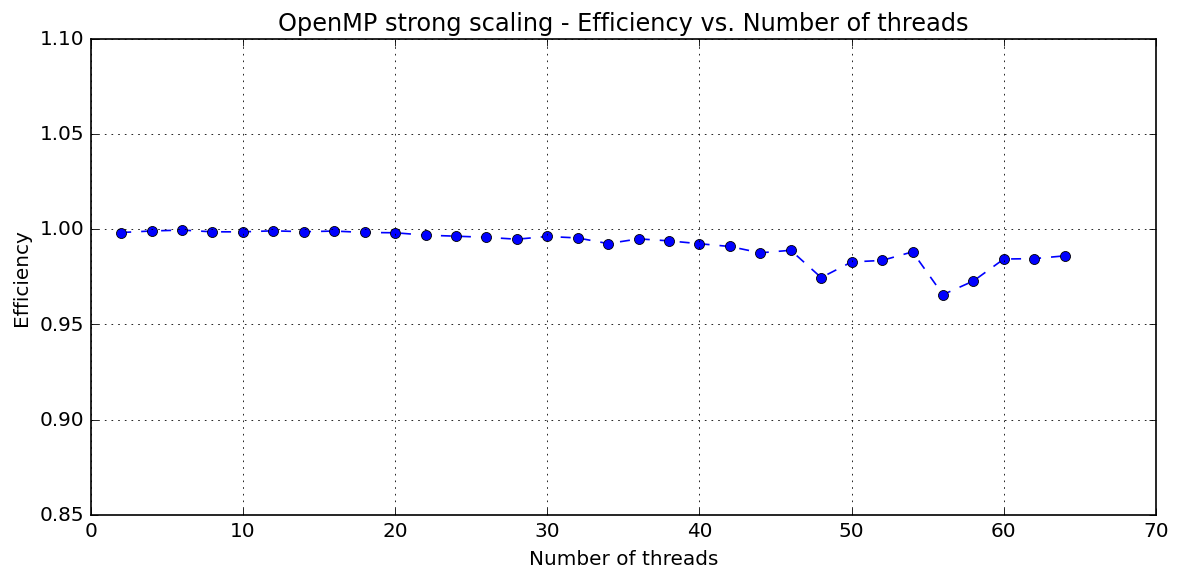

In [67]:
# Plot the efficiency for the OpenMP spread and close scaling
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
#plt.plot(omp_strong_scaling_spread_data["n_threads"], omp_strong_scaling_spread_data["Efficiency"], marker="o", linestyle="--", color="green") # label="Spread"
plt.plot(omp_strong_scaling_close_data["n_threads"], omp_strong_scaling_close_data["Efficiency"], marker="o", linestyle="--", color="blue") # label="Close"
plt.ylim(0.85, 1.1)
plt.xlabel("Number of threads")
plt.ylabel("Efficiency")
plt.title("OpenMP strong scaling - Efficiency vs. Number of threads")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

(Note: pay attention to the scale of the y-axis)

In [68]:
# Compute the efficiency for the OpenMP scaling (close binding with static scheduling)
omp_strong_scaling_close_data_static["Efficiency"] = omp_strong_scaling_close_data_static["Speedup"] / omp_strong_scaling_close_data_static["n_threads"]

# Compute the efficiency mean value for the OpenMP scaling (close binding with static scheduling)
omp_strong_scaling_close_efficiency_mean_static = np.mean(omp_strong_scaling_close_data_static["Efficiency"])

# Print the efficiency mean value for the OpenMP scaling (close binding with static scheduling)
print("OpenMP close efficiency mean value (static): \n", omp_strong_scaling_close_efficiency_mean_static)

OpenMP close efficiency mean value (static): 
 0.2727086326066587


As expected, the efficiency is quite low in the case of the static scheduling, while it is very high (close to 1) in the case of the dynamic scheduling. This is due to the fact that the dynamic scheduling is able to balance the load among the threads, while the static scheduling is not able to do so.

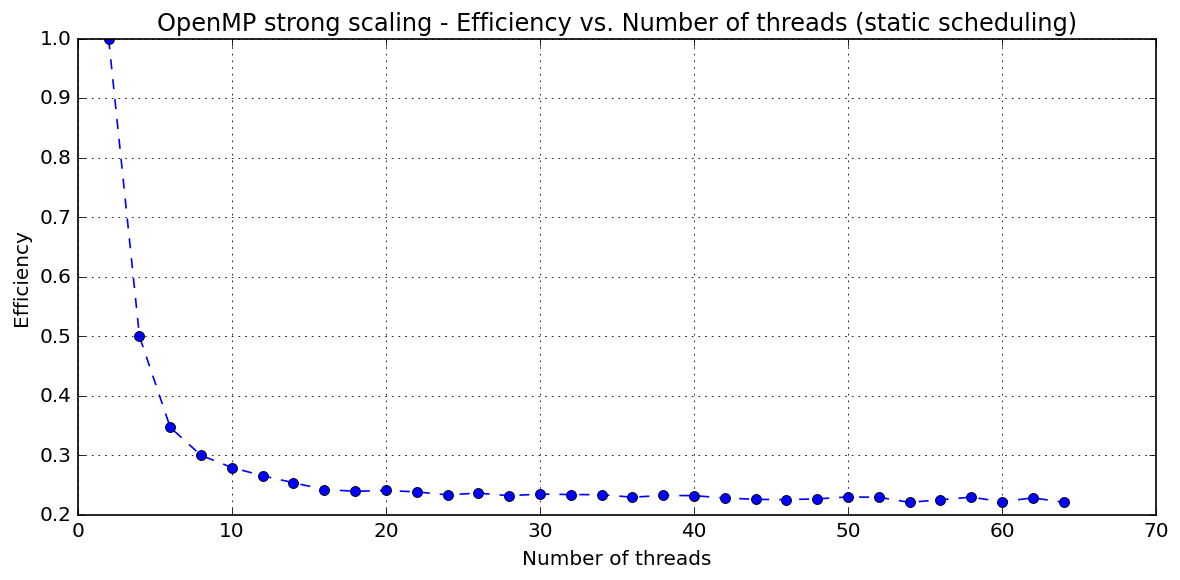

In [69]:
# Plot the efficiency for the OpenMP scaling (close binding with static scheduling)
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
plt.plot(omp_strong_scaling_close_data_static["n_threads"], omp_strong_scaling_close_data_static["Efficiency"], marker="o", linestyle="--", color="blue") # label="Close"
plt.xlabel("Number of threads")
plt.ylabel("Efficiency")
plt.title("OpenMP strong scaling - Efficiency vs. Number of threads (static scheduling)")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

Regarding the MPI strong scaling, we previously saw that by assigning the work to the threads by blocks of contiguous rows, the results were no satisfactory: in fact, the efficiency was quite low (around 0.24). This was again due to the fact that the load was not balanced among the processes. We then tried to assign the work to the processes in a round robin fashion, in order to better balance the load among the processes.

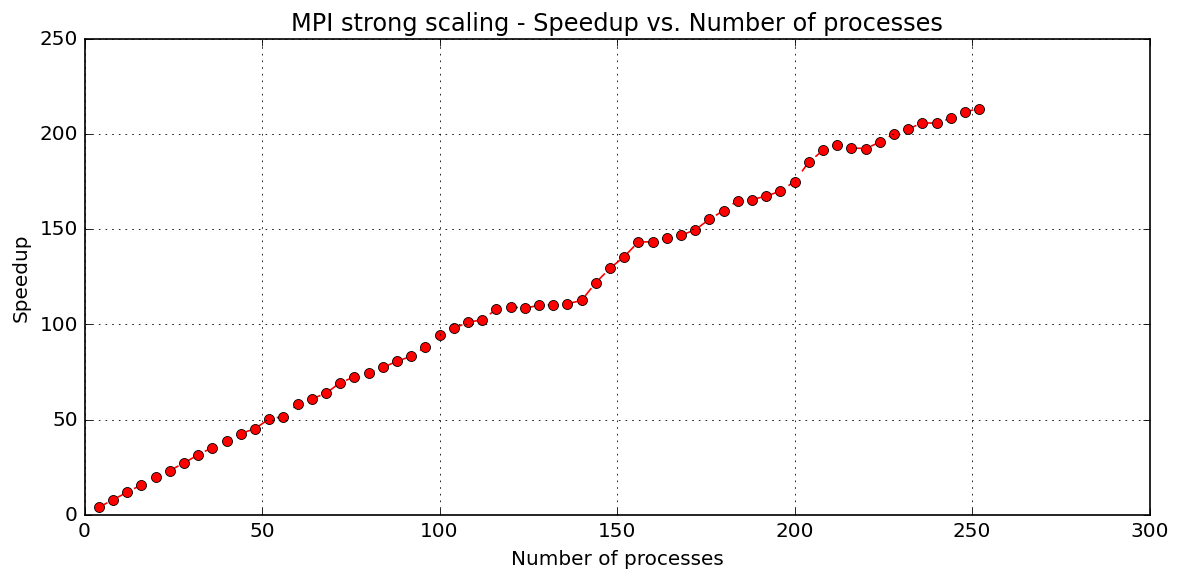

In [70]:
# Plot the speedup for the MPI scaling (core binding)
# (Here we don't consider the communication time)
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
plt.plot(mpi_strong_scaling_core_data["n_processes"], mpi_strong_scaling_core_data["Speedup"], marker="o", linestyle="--", color="red") # label="Core"
plt.xlabel("Number of processes")
plt.ylabel("Speedup")
plt.title("MPI strong scaling - Speedup vs. Number of processes")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

In [71]:
# Compute the efficiency for the MPI scaling
mpi_strong_scaling_core_data["Efficiency"] = mpi_strong_scaling_core_data["Speedup"] / mpi_strong_scaling_core_data["n_processes"]

# Compute the efficiency mean value for the MPI scaling
mpi_strong_scaling_core_efficiency_mean = np.mean(mpi_strong_scaling_core_data["Efficiency"])

# Print the efficiency mean value for the MPI scaling
print("MPI core efficiency mean value: \n", mpi_strong_scaling_core_efficiency_mean)

MPI core efficiency mean value: 
 0.9114273197618612


We can see that by assigning the work to the processes in a round robin fashion, the efficiency is much higher than before (around 0.91). This is due to the fact that the load is now better balanced among the processes. It is still lower than in the case of the OpenMP strong scaling, probably because the OpenMP dynamic scheduling is able to balance the load better than the MPI round robin scheduling I implemented.

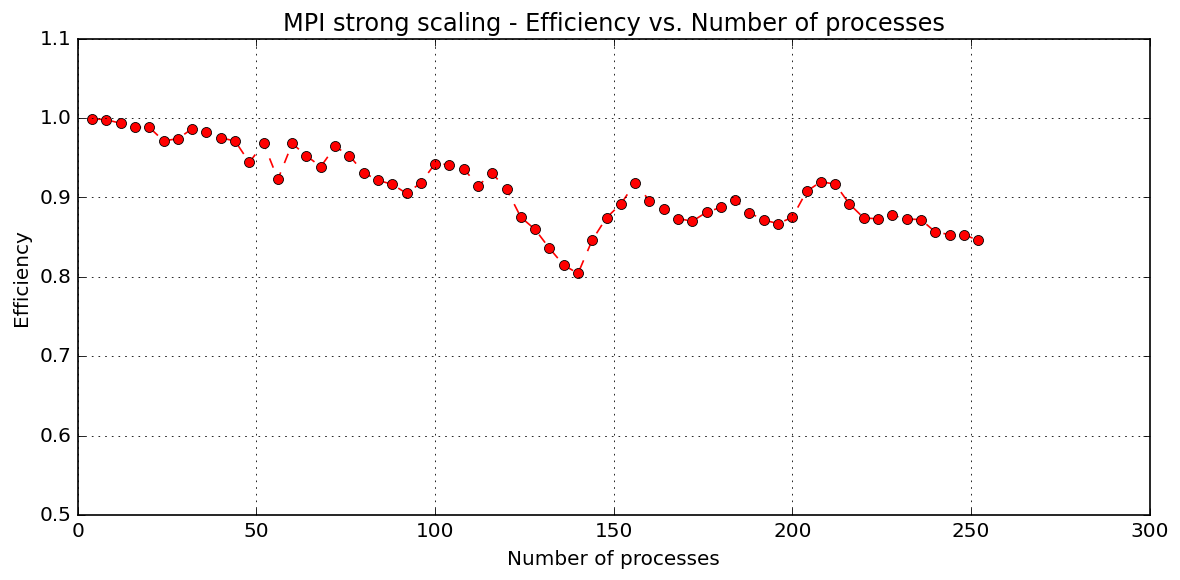

In [72]:
# Plot the efficiency for the MPI scaling (core binding)
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
plt.plot(mpi_strong_scaling_core_data["n_processes"], mpi_strong_scaling_core_data["Efficiency"], marker="o", linestyle="--", color="red") # label="Core"
plt.ylim(0.5, 1.1)
plt.xlabel("Number of processes")
plt.ylabel("Efficiency")
plt.title("MPI strong scaling - Efficiency vs. Number of processes")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

Let's now plot the average time vs the number of threads/processes for the strong scaling analysis:

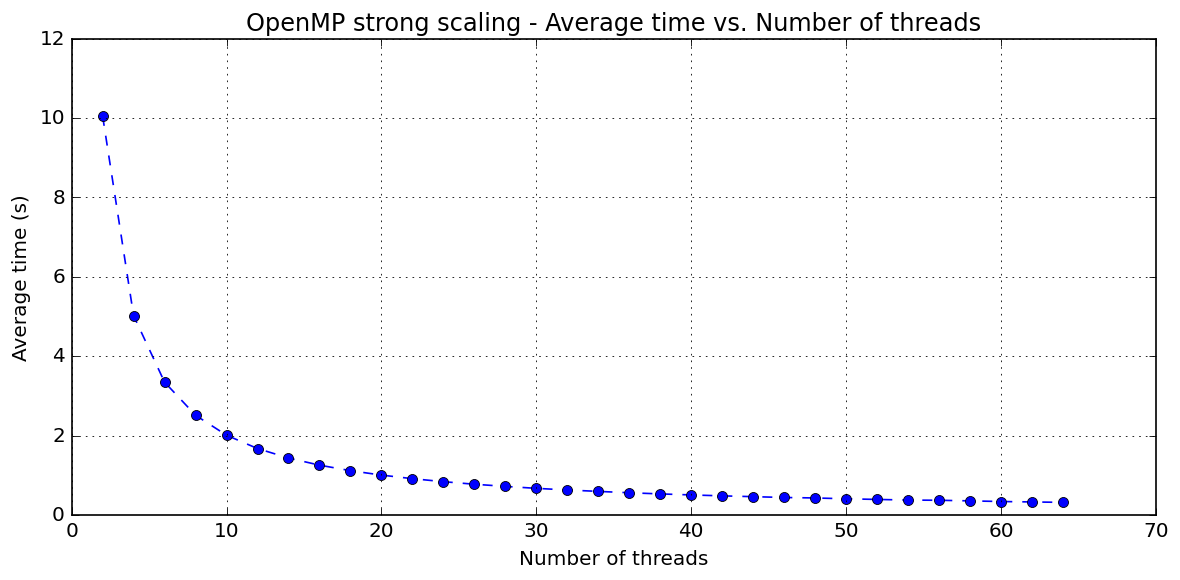

In [73]:
# Plot the OpenMP spread and close strong scaling using the average time and plotting also the standard deviation
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
#plt.errorbar(omp_strong_scaling_spread_data["n_threads"], omp_strong_scaling_spread_data["Average time"], yerr=omp_strong_scaling_spread_data["Standard deviation"], marker="o", linestyle="--", color="green", label="Spread")
plt.errorbar(omp_strong_scaling_close_data["n_threads"], omp_strong_scaling_close_data["Average time"], yerr=omp_strong_scaling_close_data["Standard deviation"], marker="o", linestyle="--", color="blue") # label="Close"
plt.xlabel("Number of threads")
plt.ylabel("Average time (s)")
plt.title("OpenMP strong scaling - Average time vs. Number of threads")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

Note: this plot and the following ones include the error bars, which are not visible due to the scale of the y-axis. However, they are present and they are quite small (around 0.001 seconds).

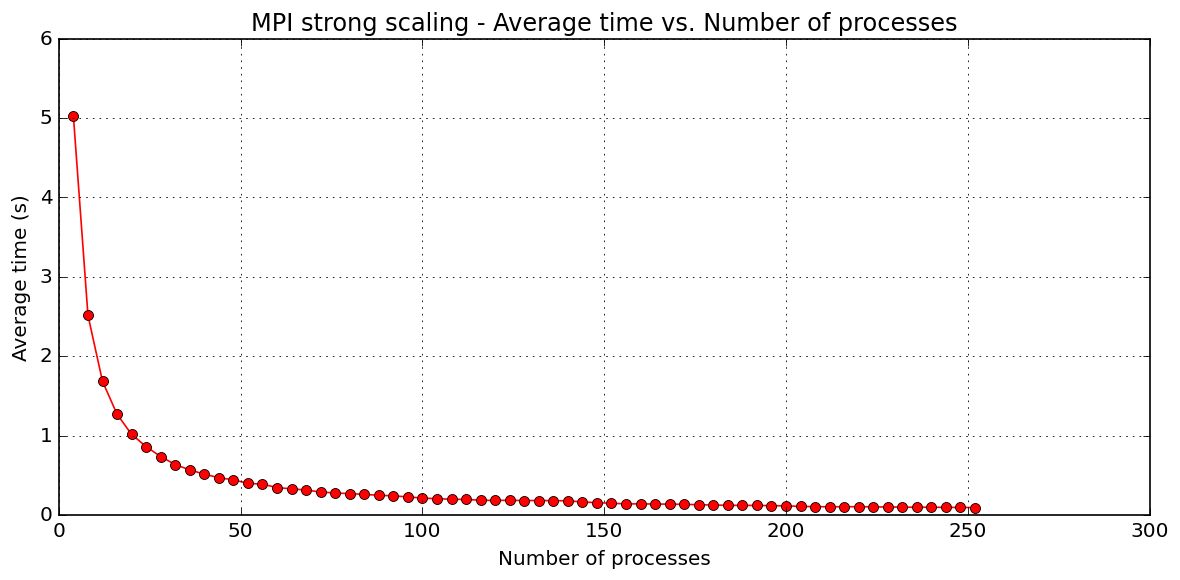

In [74]:
# Plot the MPI strong scaling using the average time and plotting also the standard deviation (core binding)
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
plt.errorbar(mpi_strong_scaling_core_data["n_processes"], mpi_strong_scaling_core_data["Average time"], yerr=mpi_strong_scaling_core_data["Standard deviation"], marker="o", linestyle="-", color="red") # label="Core"
plt.xlabel("Number of processes")
plt.ylabel("Average time (s)")
plt.title("MPI strong scaling - Average time vs. Number of processes")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

What if we consider the communication time as well?

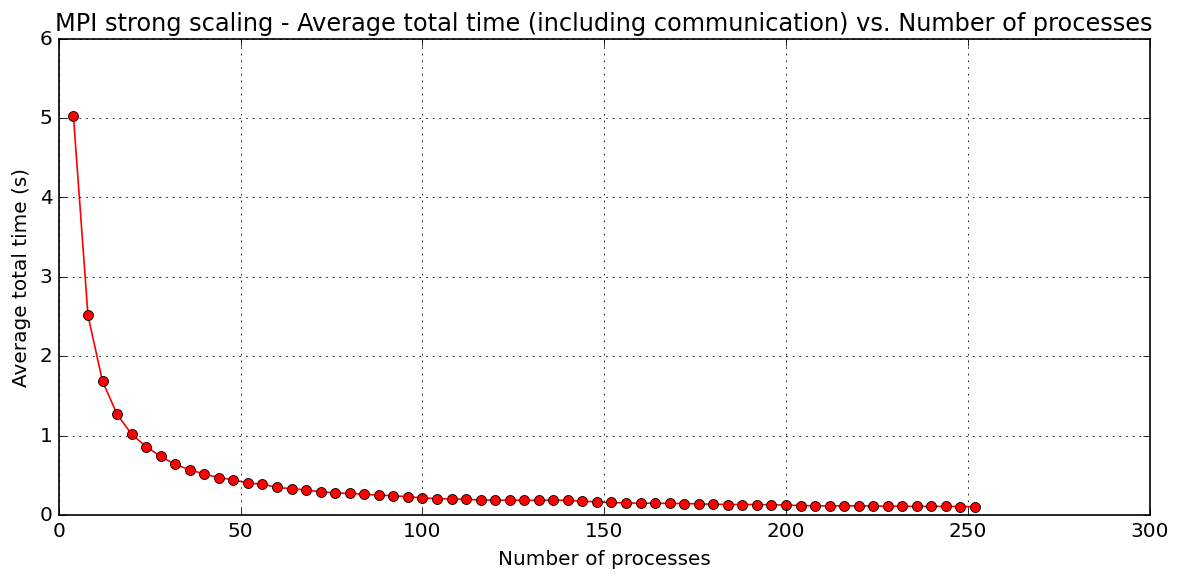

In [75]:
# Add a new column for the mpi_strong_scaling_core_data dataframe to store the
# total time (average time + communication time)
mpi_strong_scaling_core_data["Total time"] = mpi_strong_scaling_core_data["Average time"] + mpi_strong_scaling_core_data["Communication time"]

# Plot the MPI strong scaling using the total time
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
plt.plot(mpi_strong_scaling_core_data["n_processes"], mpi_strong_scaling_core_data["Total time"], marker="o", linestyle="-", color="red") # label="Core"
plt.xlabel("Number of processes")
plt.ylabel("Average total time (s)")
plt.title("MPI strong scaling - Average total time (including communication) vs. Number of processes")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

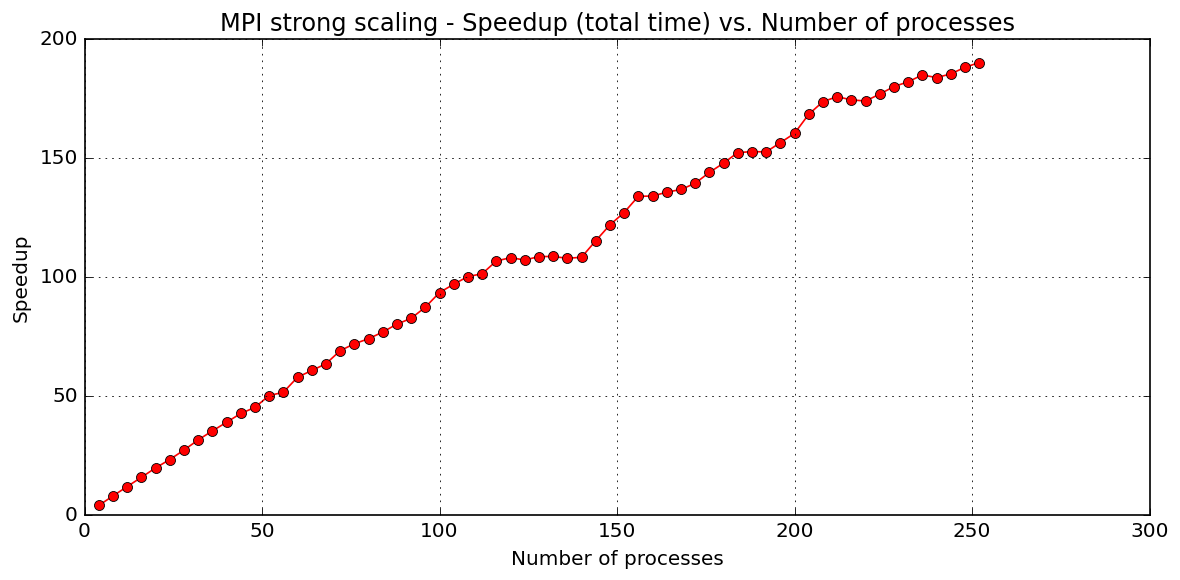

In [76]:
# Compute the speedup for the MPI scaling using the total time (average time + communication time)
mpi_strong_scaling_core_data["Speedup"] = serial_data["Average time"][0] / mpi_strong_scaling_core_data["Total time"]

# Plot the speedup for the MPI scaling using the total time (average time + communication time)
plt.style.use("classic")
plot = plt.figure(figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
plt.plot(mpi_strong_scaling_core_data["n_processes"], mpi_strong_scaling_core_data["Speedup"], marker="o", linestyle="-", color="red") # label="Core"
plt.xlabel("Number of processes")
plt.ylabel("Speedup")
plt.title("MPI strong scaling - Speedup (total time) vs. Number of processes")
#plt.legend()
plt.grid(True)

# Fix the layout and show the plot
plt.tight_layout()
plt.show()

In [77]:
# Compute the efficiency for the MPI scaling using the total time
mpi_strong_scaling_core_data["Efficiency"] = mpi_strong_scaling_core_data["Speedup"] / mpi_strong_scaling_core_data["n_processes"]

# Compute the efficiency mean value for the MPI scaling using the total time
mpi_strong_scaling_core_efficiency_mean = np.mean(mpi_strong_scaling_core_data["Efficiency"])

# Print the efficiency mean value for the MPI scaling using the total time
print("MPI core efficiency mean value (total time): \n", mpi_strong_scaling_core_efficiency_mean)


MPI core efficiency mean value (total time): 
 0.8743315811242447


We can see that the communication time is quite low, although it increases with the number of processes. However, the communication time is much lower than the computation time, so it does not affect the overall performance and efficiency (it decreases only to 0.87).

Let's now move to the weak scaling analysis: